# Lesson 2
Rob Lisy
A certain casino has contracted your team to determine if there are any patterns among their tables and patron attendance. They are not asking for prediction, just for a description of what is already there.

Now that we have studied different plot types and their usefulness in determining what is available in the data. Use the Jittered Head Count data set to find and report on interesting relationships in the data.

- Create different complementary views of data by applying multiple chart types and aesthetics.
- Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I like big plots, and I cannot lie...
sns.set(rc={'figure.figsize':(11, 4)})

# Read in the data
df = pd.read_csv('JitteredHeadCount.csv')
df.head()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47


In [13]:
# what data types are we working with?
print(f'Column types \n{df.dtypes}')
print(f'Dataframe shape: {df.shape}')

Column types 
GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object
Dataframe shape: (175677, 9)


In [14]:
# Let's make that date a real date.
df['Date'] = pd.to_datetime(df['DateFormat'])

# And lets get sensible game names in for that GameCode
# There's 7 "blackjack variants" listed... Poker variants don't get the same treatment.
# just useful to note this, may have to correct this later.
m = {'BA': 'Baccarat', 'C4': 'Blackjack variant',
    'CR': 'Craps', 'DH': 'Blackjack variant',
    'FP': 'Four Card Poker', 'LI': 'Let it Ride',
    'MI': 'Omaha Hi-Low', 'MQ': 'Blackjack variant',
    'MR': 'Mini-Baccarat', 'MS': 'Mississippi Stud',
    'ND': 'Blackjack variant', 'PA': 'Pai Gow Tiles',
    'PG': 'Pai Gow', 'RO': 'Roulette',
    'RR': 'Electronic Roulette', 'S6': 'Big Six',
    'SH': 'Blackjack variant', 'TH': 'Blackjack variant',
    'TL': 'Blackjack variant', 'TP': "Texas Hold'em Poker",
    'UT': "Ultimate Texas Hold'em", 'WR': 'Casino War'}

df['Game'] = df['GameCode'].map(m)
df['Game'].value_counts()

Blackjack variant         61446
Four Card Poker            8778
Mini-Baccarat              8778
Electronic Roulette        8778
Ultimate Texas Hold'em     8778
Texas Hold'em Poker        8778
Roulette                   8778
Big Six                    8778
Pai Gow Tiles              8778
Craps                      8778
Let it Ride                8778
Casino War                 8778
Pai Gow                    8778
Omaha Hi-Low               8630
Mississippi Stud            147
Baccarat                    118
Name: Game, dtype: int64

In [15]:
# Let's look at the most basic time series - head count by date, by game
df_by_date_game = df.groupby(['Date', 'Game'], as_index=False)[['HeadCount']].sum()
df_by_date_game.head()
df_by_date_game.dtypes

Date         datetime64[ns]
Game                 object
HeadCount             int64
dtype: object

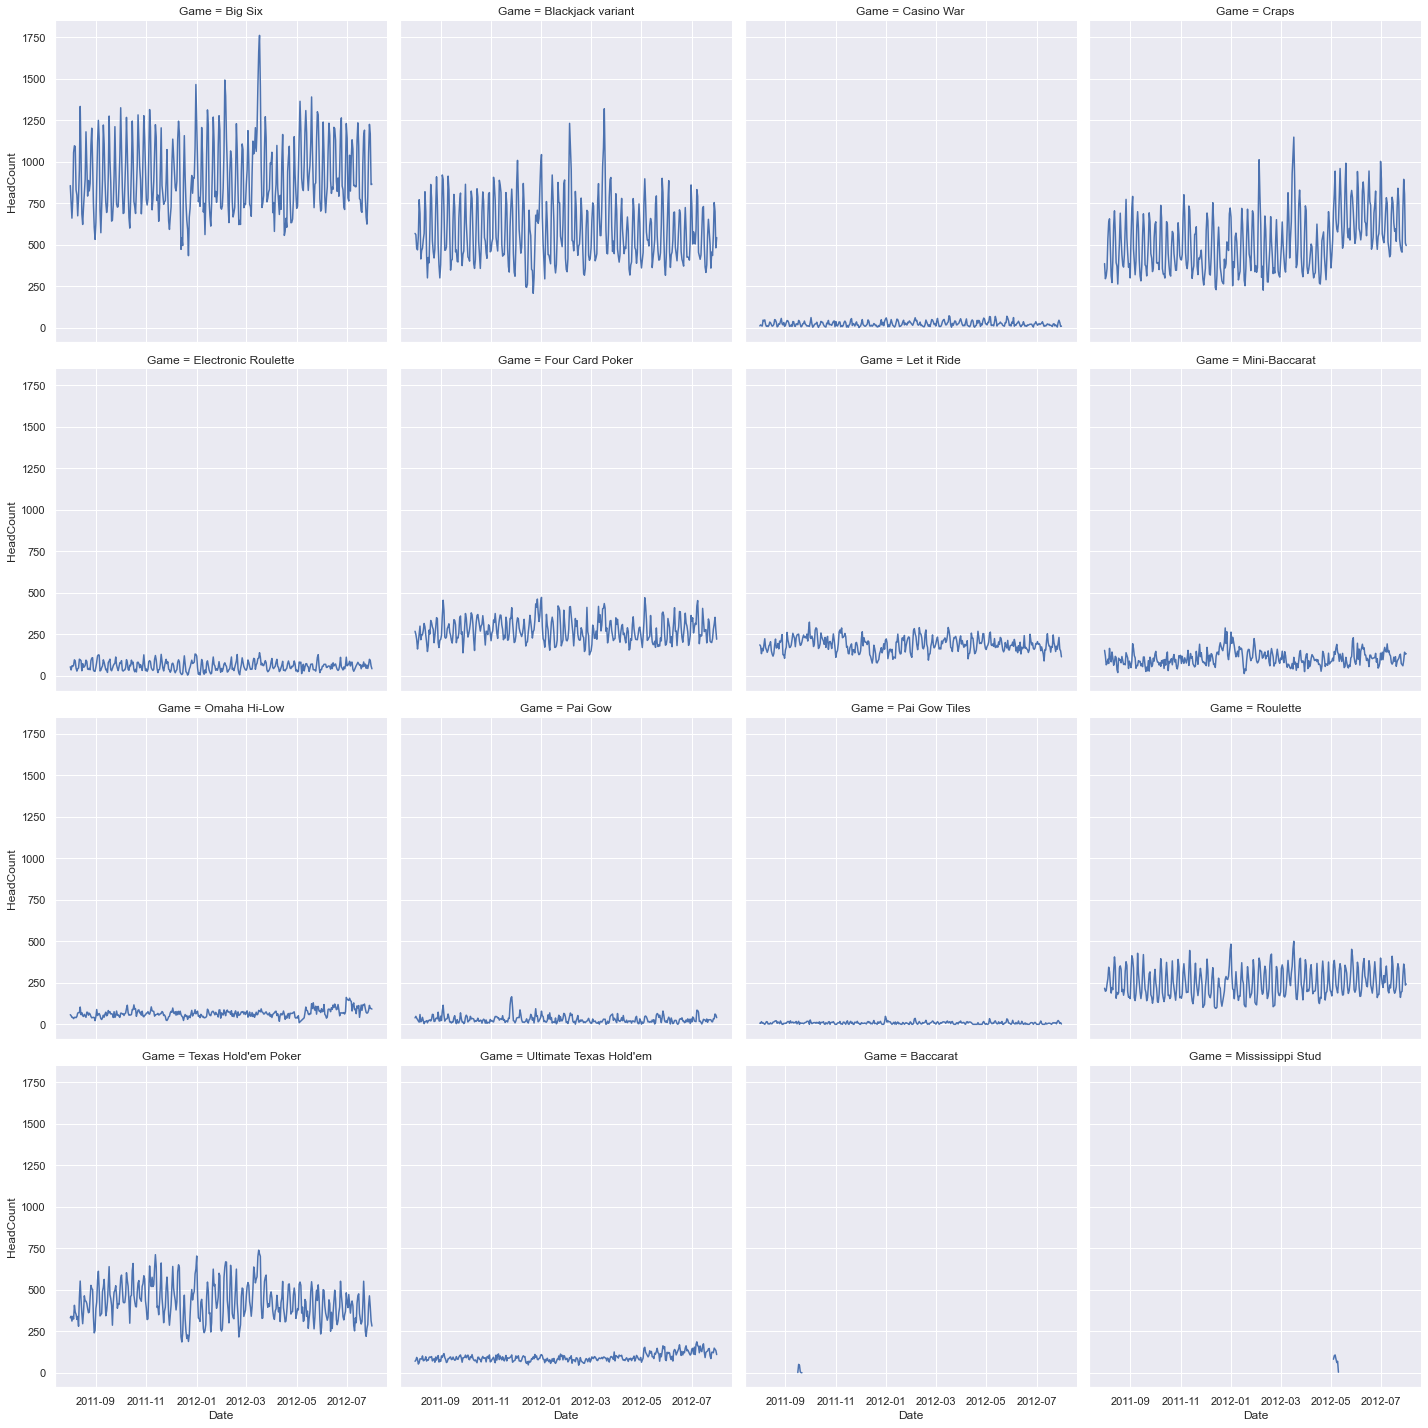

In [21]:
ax = sns.relplot(x='Date', y='HeadCount', col='Game', col_wrap=4, data=df_by_date_game, kind='line')

### Things we've learned:

- Baccarat and Mississippi stud haven't run for the whole time series
- Casino War and Pai Gow are not popular games
- Craps has a disjoint period with a level shift, sometime around May 2012

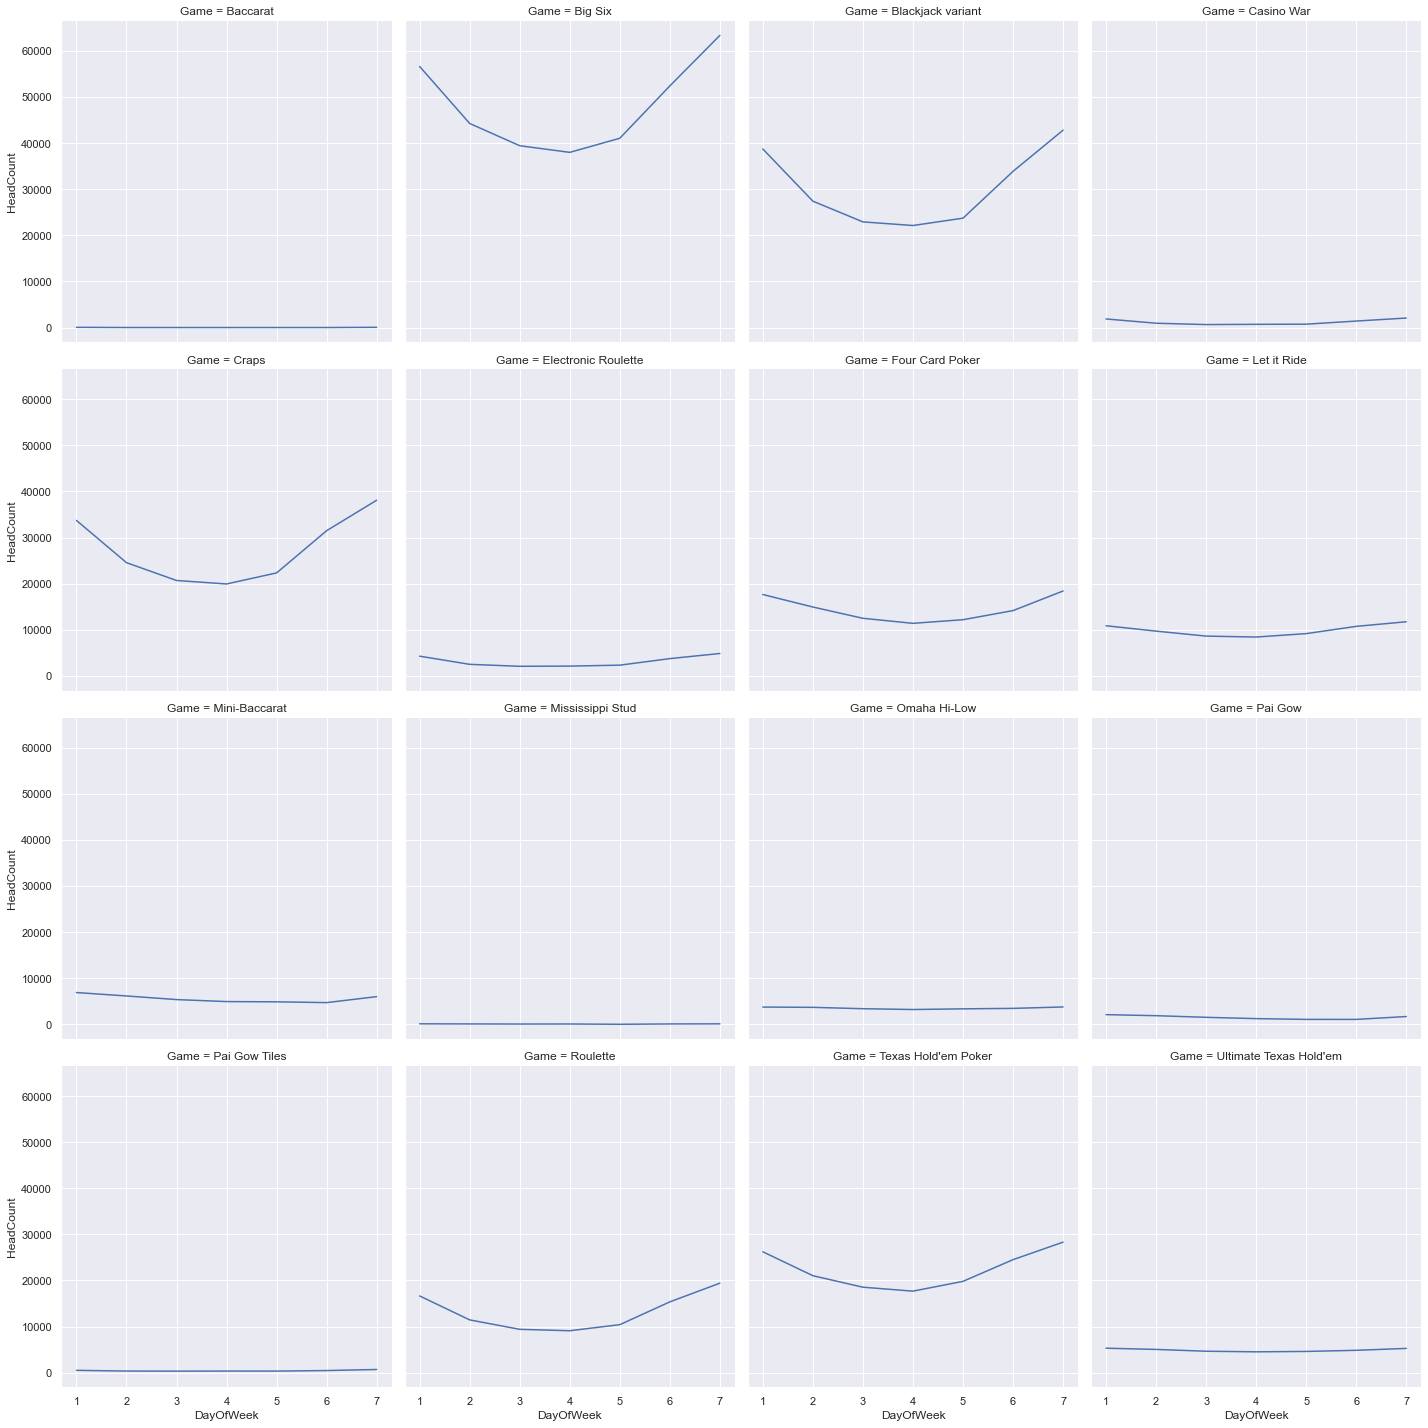

In [23]:
# Let's look at the data grouped by day of week
# This could show us games that have different popularities on different days of the week
# N.B. 
df_by_dow_game = df.groupby(['DayOfWeek', 'Game'], as_index=False)[['HeadCount']].sum()
ax = sns.relplot(x='DayOfWeek', y='HeadCount', col='Game', col_wrap=4, data=df_by_dow_game, kind='line')

### Things we've learned
- People gamble on weekends... not a very surprising finding
- Big 6 and Craps have high intra-week variance (i.e. their weekends are way better than their weekdays)
- Nobody likes Pai Gow, Pai Gow Tiles, Mississippi Stud, Omaha Hi-Low, Casino War, or Baccarat

In [27]:
# Day of week is really a category, not numeric...
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df.dtypes

GameCode                object
DateFormat              object
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek             category
DayNumber                int64
Date            datetime64[ns]
Game                    object
dtype: object

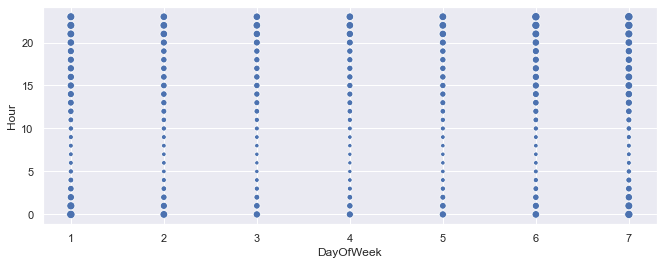

In [44]:
# Day of week, hour of day,
df_hex_plot = df.groupby(['DayOfWeek', 'Hour'], as_index=False)[['HeadCount']].sum()
sns.scatterplot(x='DayOfWeek', y='Hour', data=df_hex_plot, size='HeadCount', legend=False);

# Least busy times for the casino are Monday, Tuesday, Wednesday, Thrusd